# Predicting Star Ratings of Edinburgh Airbnbs through Review Texts Analysis

# Notebook 2: EDA

In this notebook, we will perform some exploratory data analysis in order to understand our datasets in more detail. Furthermore, we will gather more insights abour the distributions about our key data features and review texts. These will be done with the assistance of data visualisations.

***

# Table of Contents

1. [**Exploratory Data Analysis**](#b1)<br>
    1.1 [**Number of Listings by Host**](#b1.1)<br>
    1.2 [**Number of Listings by Number of Reviews**](#b1.2)<br>
    1.3 [**Different Review Ratings Correlations**](#b1.3)<br>
    1.4 [**Overall Rating with Numerical Features Correlation**](#b1.4)<br>
    1.5 [**Overall Rating Distribution by Rating Ranges**](#b1.5)<br>
    1.6 [**Sentiment distributions by Rating Types**](#b1.6)<br>
    1.7 [**Different Review Ratings Distribution**](#b1.7)<br>
    1.8 [**Average Review Ratings by Rating Type**](#b1.8)<br>
    1.9 [**Overall Ratings Distribution by Price Ranges**](#b1.9)<br>
    1.10 [**Histograms for all Numerical Features**](#b1.10)<br>
2. [**Review Findings**](#b2)<br>
3. [**EDA Suummary**](#b3)<br>

***

###  Import Libraries and Load cleaned data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

# Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Library to save data
import joblib

In [2]:
# Load the cleaned listing and review datas
df_listings_clean=joblib.load('data/df_listings_clean.pkl')
df_reviews_clean=joblib.load('data/df_reviews_clean.pkl')

***

# Exploratory Data Analysis <a id="b1"></a>

We can start the exploratory data analysis to gather some basic information about the two datasets, and also explore the statistical characteristics of the star ratings before we jump into the reviews. 

First, we can start by looking at the number of listings per host.

## Number of Listings by Host <a id="b1.1"></a>

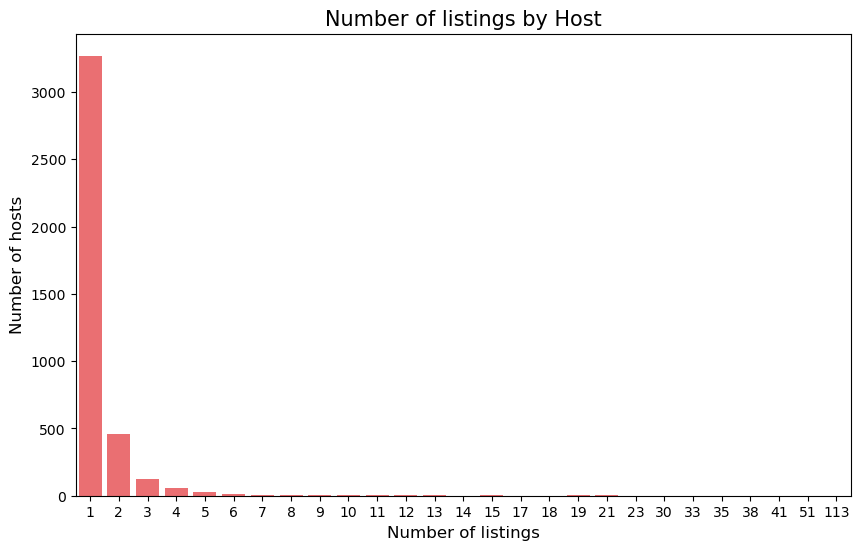

In [3]:
# Grouping by host_id and counting the number of listings for each host
listings_per_host = df_listings_clean.groupby('host_id').size()

# Counting the frequency of each count of listings
listings_count = listings_per_host.value_counts().sort_index()

# Plot figure
plt.figure(figsize=(10,6))
ax = sns.barplot(x=listings_count.index, y=listings_count.values, data=df_listings_clean, color='#FF5A5F')

# Edit labels
ax.set_title("Number of listings by Host", fontsize=15)
ax.set_xlabel("Number of listings", fontsize = 12)
ax.set_ylabel("Number of hosts", fontsize = 12)
ax.tick_params(axis='x')

plt.show()

- The histogram of the **number of listings by host** reveals a highly right-skewed distribution, indicating that most hosts possess only one rental property on Airbnb.

- However, a notable subset of hosts possess an elevated number of listings, potentially representing a group of commercial or non-private hosts. To investigate this further, a binary feature column can be created to differentiate between private and commercial hosts, facilitating an analysis of which group has higher ratings. The investigation can potentially provides some guidance for hosts considering expanding their rental portfolio on Airbnb.

***

## Number of Listings by Number of Reviews <a id="b1.2"></a>

In [4]:
# Grouping by host_id and counting the number of listings for each host
reviews_per_listing = df_reviews_clean.groupby('listing_id').size()

# Counting the frequency of each count of listings
reviews_count = reviews_per_listing.value_counts().sort_index()

# Show the number of listings by number of reviews count
reviews_count

3       184
4       169
5       144
6       126
7       136
       ... 
993       1
1000      1
1041      1
1046      1
1173      1
Length: 512, dtype: int64

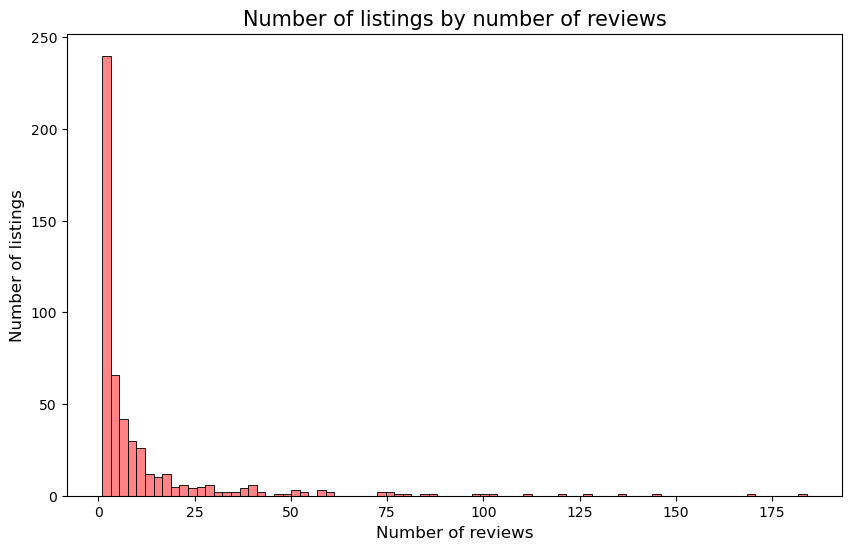

In [5]:
# plot figure
plt.figure(figsize=(10,6))

# Histogram shows the number of reviews distributed by the number of listings


# Plot figure
ax = sns.histplot(data=reviews_count.values,color='#FF5A5F')

# Add labels
ax.set_title("Number of listings by number of reviews", fontsize=15)
ax.set_xlabel("Number of reviews", fontsize = 12)
ax.set_ylabel("Number of listings", fontsize = 12)

plt.show()

- The histogram of **number of reviews** shows similar trend of the previous graph, with a highly right-skewed distribution. This skewness indicates that the majority of listings receive only a handful of reviews. Notably, a gap near **zero** on the x-axis is due to the filtering condition applied in the data cleaning process where only listings with more than **three** reviews were included for analysis. 

- However, the graph illustrates that some listings accumulate approximatley 175 reviews. It's worth mentioning that while the histogram captures the reviews up to this count, our initial calculation reveals that certain listings has up to **1000** reviews. This observation holds significance as the number of reviews can potentially affect the accuracy of predictions when using them to predict average ratings. Thus, we can use the review count as a predictive factor in ensuring the robustness of our predictions.

***

## Different Review Ratings Correlations <a id="b1.3"></a>

Next, we would like to see the correlation relationships between different types of ratings and thus obtain a general idea which subrating could potentially influence the overall rating the most.

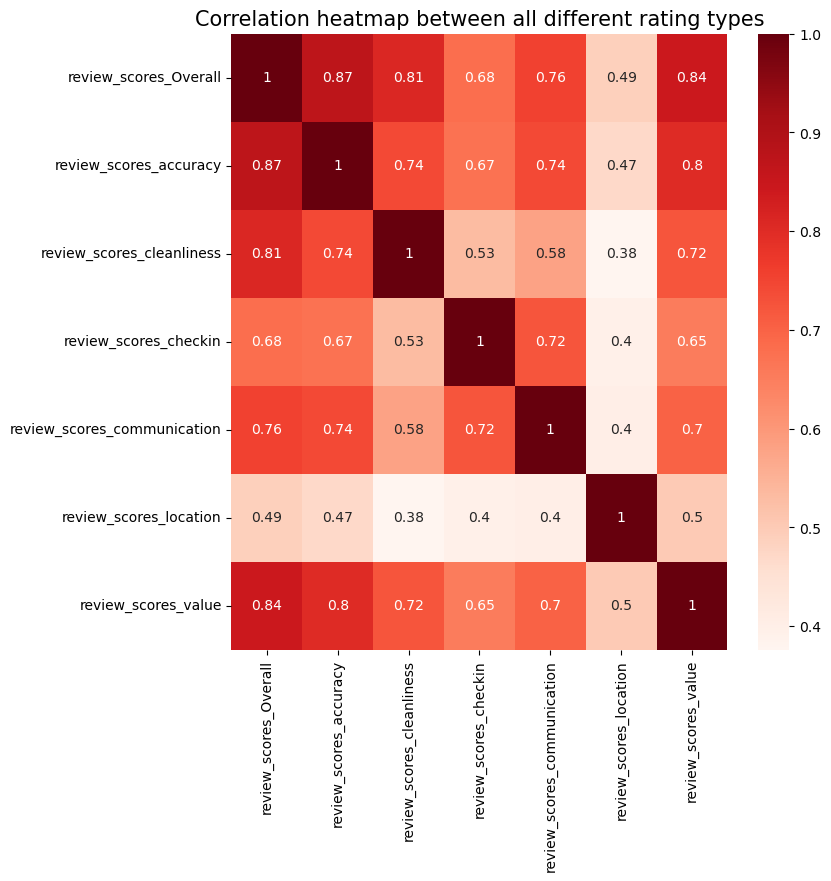

In [6]:
# Rename the review_scores_rating to overall rating in order to prevent confusions
df_listings_clean = df_listings_clean.rename(columns={'review_scores_rating': 'review_scores_Overall'})

# Create dataframe that only contains different average ratings scores
df_ratings=df_listings_clean[['review_scores_Overall',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]

# Determine the graph size
plt.figure(figsize=(8,8))

# Plot the correlation heatmap between all different rating types
sns.heatmap(df_ratings.corr(),cmap='Reds', annot=True )

# Add title
plt.title('Correlation heatmap between all different rating types', fontsize=15)

plt.show()

**Strong Correlations with Overall Rating**

The accuracy rating score, cleanliness rating score, and value rating score show strong correlations with the overall rating score. This suggests that these three aspects - accuracy of rental description, cleanliness, and perceived value - significantly impact guests' overall satisfaction and rating of the rental.

**Weak Correlation with Overall Rating**

In contrast, the location rating score demonstrates the weakest correlation with the overall rating score. Additionally, it shows weak relationships with all other subrating scores. This implies that the location of the rental has less influence on guests' overall satisfaction compared to other factors.

**Adjustability and impact on ratings**

Hosts have the opportunity to adjust factors such as rental description accuracy, overall cleanliness, and the perceived value of the rental. Given their strong correlations with the overall rating, improving these aspects could lead to higher overall ratings and increased guest satisfaction. Conversely, the location of the rental, being less adjustable, tends to have a weaker impact on overall ratings.

**Focus on predicting subratings**

Based on this correlation map, it's evident that predicting the accuracy, cleanliness, and value ratings could be equally important as predicting the **overall rating**. Focusing on predicting these subratings accurately can provide hosts with deeper insights into specific areas for improvements.

***

## Overall Rating with Numerical Features Correlation <a id="b1.4"></a>

Next, we will look at the relationship between all the numerical features in our listing dataset and the overall rating.

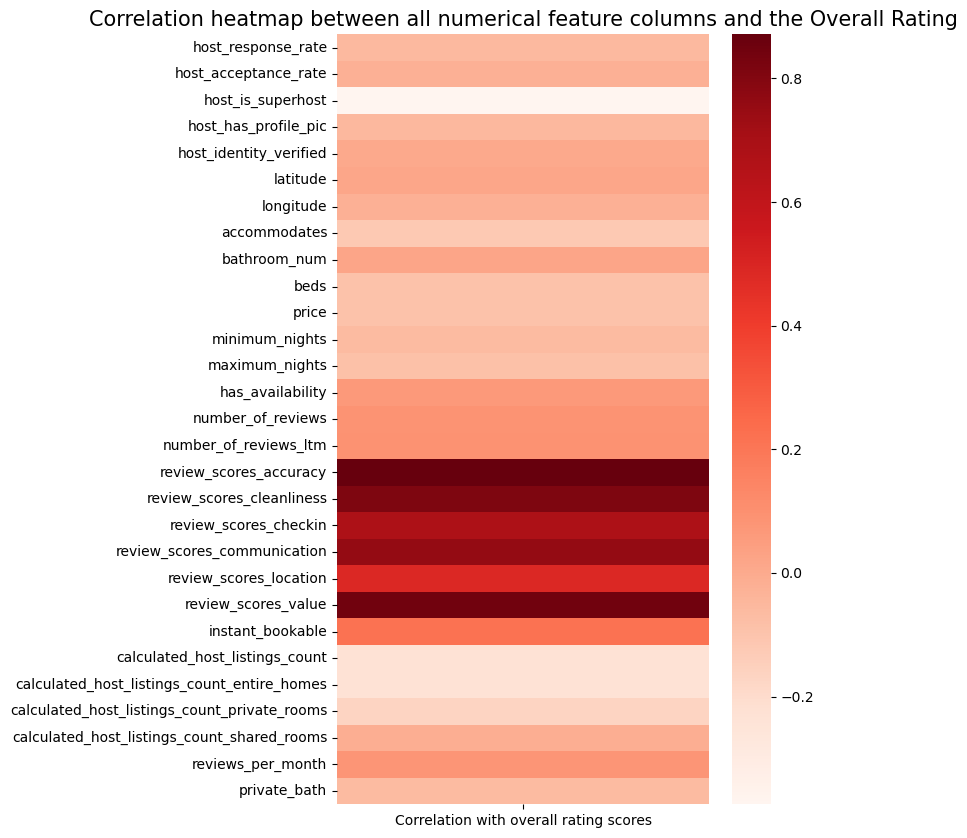

In [7]:
# Return list of numerical column names
num_cols=df_listings_clean.select_dtypes(exclude='object').columns

# Remove irrelevant columns from the list
num_cols_clean=num_cols.drop(['id', 'host_id', 'review_scores_Overall'])

# Return correlation coefficients between overall rating and the rest of the numerical features
corr_with_ratings=df_listings_clean[num_cols_clean].corrwith(df_listings_clean['review_scores_Overall'])


# Adjust figure size
plt.figure(figsize=(6,10))

# Plot the correlation heatmap
sns.heatmap(pd.DataFrame(corr_with_ratings, columns=['Correlation with overall rating scores']), cmap='Reds')

# Add title
plt.title('Correlation heatmap between all numerical feature columns and the Overall Rating', fontsize=15)

plt.show()

- The correlation heatmap between all numerical features in the dataset and the **Overall Rating** score reveals that, aside from the sub ratings, none of the current numerical features show a strong relationship with the Overall Rating score. This highlights the limited influence of the current features. Therefore, to effectively predict and analyze overall rating behavior, it is important to incorporate other sources of information such as customer reviews.

***

## Overall Rating Distribution by Rating Ranges <a id="b1.5"></a>

Now, we are interested in the distribution of overall rating scores. Upon examining the statistical distribution, we observe that the ratings predominantly exceed 4. 

Consequently, we aim to visualize the distribution more clearly by segregating the data into different ranges above 4. This segmentation will allow us to gain a clearer understanding of the distribution of ratings and identify any potential patterns or anomalies within these higher ranges.

In [8]:
# Statistical distribution of the overall rating scores
df_ratings['review_scores_Overall'].describe()

count    5910.000000
mean        4.779514
std         0.241136
min         2.250000
25%         4.690000
50%         4.850000
75%         4.940000
max         5.000000
Name: review_scores_Overall, dtype: float64

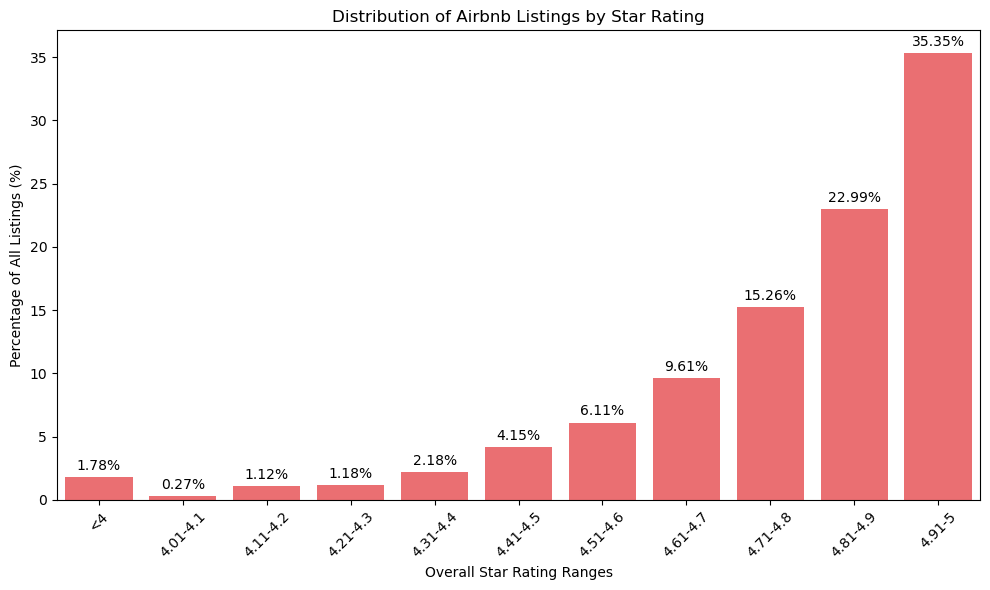

In [9]:
# Define bins and labels for the star rating ranges
bins = [0, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5]
labels = ['<4', '4.01-4.1', '4.11-4.2', '4.21-4.3', '4.31-4.4', '4.41-4.5',
          '4.51-4.6', '4.61-4.7', '4.71-4.8', '4.81-4.9', '4.91-5']

# Bin the data into the specified ranges
overall_ratings_by_range = pd.cut(df_ratings['review_scores_Overall'], bins=bins, labels=labels, include_lowest=True)

# Calculate the percentage of listings in each bin
percentage_df = overall_ratings_by_range.value_counts(normalize=True).sort_index() * 100

# Reset index to have the rating range as a column
percentage_df = percentage_df.reset_index()
percentage_df.columns = ['rating_range', 'percentage']

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='rating_range', y='percentage', data=percentage_df, color='#FF5A5F')

# Annotate each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 8), 
                     textcoords='offset points')

# Setting the titles and labels
plt.title('Distribution of Airbnb Listings by Star Rating')
plt.xlabel('Overall Star Rating Ranges')
plt.ylabel('Percentage of All Listings (%)')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

#plt.savefig('Distribution_of_listings_by_rating.jpg', dpi=600)

plt.show()

- The overall rating scores continue to display a left-skewed distribution even after segregating into ranges above 4. It's evident that more than **74%** of the listings achieve an overall rating above 4.7, indicating a prevalent trend towards high ratings. Conversely, less than **2%** of listings receive an overall rating below 4. 

- This distribution underscores the predominance of positive ratings across the dataset. Therefore, it is logical to transform this rating distribution into sentiments, categorizing listings with scores above **4.8** as 1, and those below 4.8 but above 4 as 0, and those below 4 as -1. This transformation enables us to enhance classification predictions and simplify our model assumption. We will perform this transformation for all rating types.

### Transform Rating Scores to Sentiment Scores

In [10]:
# Define Sentiment Classification Threshold
threshold=4.8

# Create transformation function
def convert_to_sent(score):
    if score>threshold:
        return 1
    else:
        return 0

# Create sentiment dataframe
df_sentiment=pd.DataFrame()
    
# Apply transformation to each column in the rating dataframe
for i in df_ratings.columns:
    temp_i_list = df_ratings[i].apply(convert_to_sent)
    temp_name=i.split('_')[2]+'_sentiment'
    df_sentiment[temp_name] = temp_i_list

# Merge the sentiments to the original dataframe
df_listings_clean_senti = pd.concat([df_listings_clean, df_sentiment], axis=1)

***


## Sentiment distributions by Rating Types <a id="b1.6"></a>

After transforming the ratings into sentiments, we can now visualize the proportion of these sentiments using a bar plot. This visualization will provide insights into whether our target variables are imbalanced.

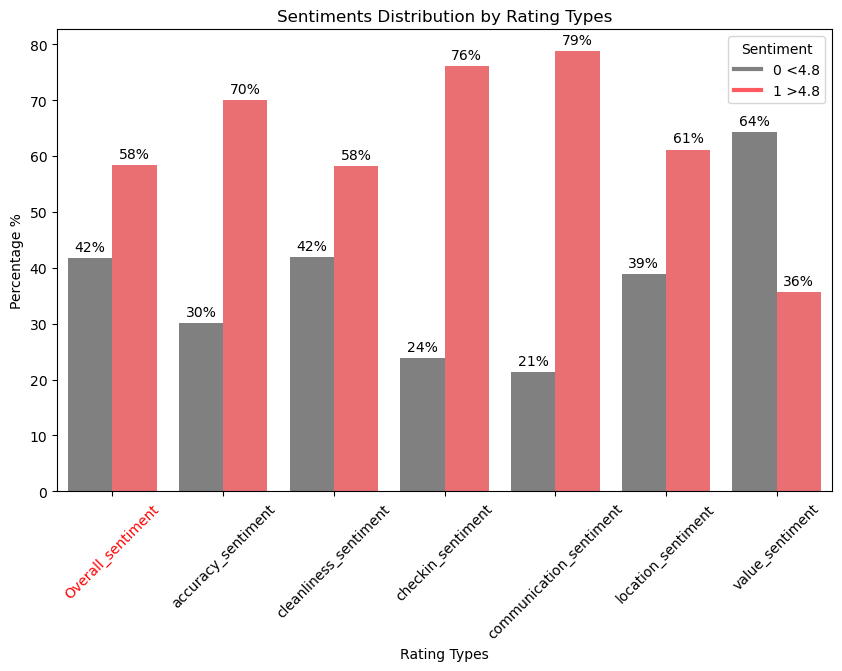

In [11]:
from matplotlib.ticker import FuncFormatter

# Create lists contain sentiment types and proportion of positive and negative sentiments
rating_type=[]
sentiment=[]
proportion=[]

for i in df_sentiment.columns:
    rating_type.extend([i,i])
    sentiment.extend([0,1])
    proportion.extend([
        (1-df_sentiment.mean()[i])*100,
        (df_sentiment.mean()[i])*100
    ])

# Create sentiment proportion dataframe
df_sentiment_proportions =pd.DataFrame({
    'Rating_Type': rating_type,
    'Sentiment': sentiment,
    'Proportion': proportion
})

# Determine figure size
plt.figure(figsize=(10, 6))

# Plot two bars per sentiment type 
ax=sns.barplot(data=df_sentiment_proportions, 
            x='Rating_Type', 
            y='Proportion', 
            hue='Sentiment', 
            palette=['grey', '#FF5A5F'])

# Add annotation
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height:.0f}%', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')

# Add labels and legends
plt.title('Sentiments Distribution by Rating Types')
plt.xlabel('Rating Types')
plt.ylabel('Percentage %')

plt.legend(title='Sentiment', 
           labels=['0 <4.8', '1 >4.8'],
           handles=[
    plt.Line2D([0], [0], color='grey', lw=3),
    plt.Line2D([0], [0], color='#FF5A5F', lw=3)
])

# Adjust layouts and labels
plt.xticks(rotation=45)
ax.axes.get_xticklabels()[0].set_color('red')

plt.show()

- From the grouped bar plot above, we observe that the overall sentiment comprises **58%** positive sentiments, indicating an equal proportion of listings with a rating score higher than 4.8. This is fine for our model later as it is not imbalanced towards one of the sentiment.

- The proportions for the other sub-ratings are also intriguing. The communication sentiment proportions reveal that **79%** of people rate listings higher than 4.8, while the value sentiment is the only one showing a reversed proportion, where only **36%** of people would rate listings higher than 4.8. This suggests that it is more challenging for people to rate higher for the value of the Airbnb, while it is conversely easier to rate higher for host communication.

***

## Different Review Ratings Distribution <a id="b1.7"></a>

Next, we will discuss the distribution for different rating types in more details. 

In [12]:
# Create two lists contain index of listings differentiated by the rating scores of 4
rating_less_than_4 = []
for i in range(df_ratings.shape[0]):
    for j in df_ratings.columns:
        if df_ratings.loc[i][j] <4:
            rating_less_than_4.append(i)
rating_more_than_4 = ~df_ratings.index.isin(rating_less_than_4)

# Return two dataframes contain differentiated listings
df_ratings_less_than_4=df_ratings.loc[rating_less_than_4]
df_ratings_more_than_4=df_ratings.loc[rating_more_than_4]

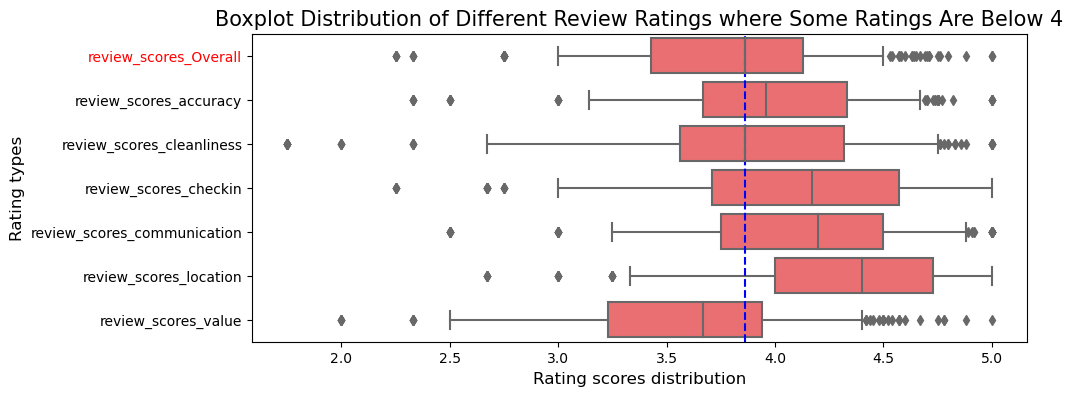

In [13]:
# Draw boxplots for all columns on the same plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
ax = sns.boxplot(data=df_ratings_less_than_4, orient='h', color='#FF5A5F', whis=[5, 95])


# Edit labels
ax.set_title("Boxplot Distribution of Different Review Ratings where Some Ratings Are Below 4", fontsize=15)
ax.set_xlabel("Rating scores distribution", fontsize = 12)
ax.set_ylabel("Rating types", fontsize = 12)

ax.axes.get_yticklabels()[0].set_color('red')

# Draw a line of Overall ratings mean on the boxplot 
line_position1 = df_ratings_less_than_4['review_scores_Overall'].median()  # Position of the line
plt.axvline(x=line_position1, color='blue', linestyle='--')

# Show figure
plt.show()

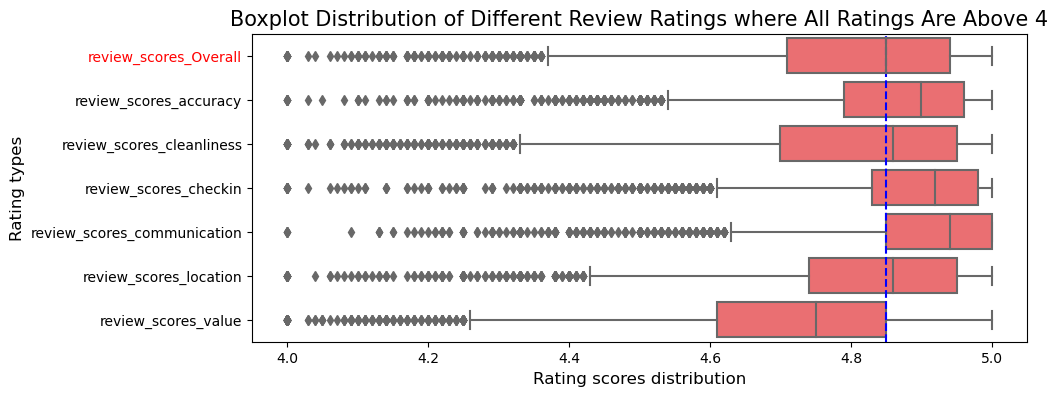

In [14]:
# Draw boxplots for all columns on the same plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
ax=sns.boxplot(data=df_ratings_more_than_4, orient='h', color= '#FF5A5F')

# Edit labels
ax.set_title("Boxplot Distribution of Different Review Ratings where All Ratings Are Above 4", fontsize=15)
ax.set_xlabel("Rating scores distribution", fontsize = 12)
ax.set_ylabel("Rating types", fontsize = 12)

ax.axes.get_yticklabels()[0].set_color('red')

# Draw a line on the boxplot
line_position = df_ratings_more_than_4['review_scores_Overall'].median()   # Position of the line
plt.axvline(x=line_position, color='blue', linestyle='--')

#ax.figure.savefig('output_figure.png',dpi=600)
plt.show()

Our analysis on the review ratings distribution is divided into two parts: analysis on listings with any rating lower than 4, and analysis on listings with all ratings higher than 4. This approach allows us to focus on visualizing ratings in more detail, particularly in the above 4 region, given that over 98% of the ratings fall within this range.

- In the first plot, we observe that besides the value scores, most of the other sub-ratings exhibit similar distributions to the overall ratings. However, the **cleanliness rating** shows a wider distribution, indicating that listings vary in their cleanliness levels, with some suffering from extremely low cleanliness scores. This discrepancy might be due to guests' strong aversion to dirty listings, leading them to rate them much lower. This trend is consistent in the plot for all ratings above 4, where the **value rating** exhibits the most variability, followed by cleanliness. Additionally, the overall rating has a **lower median** compared to most of the other ratings, while rating of **communication** tends to receive higher scores. These findings align with our previous observations.

***

## Average Review Ratings by Rating Type <a id="b1.8"></a>

Now that we have discussed the rating distributions as well as the transformed sentiment distributions. We can also visualize the average score for each of the rating type.

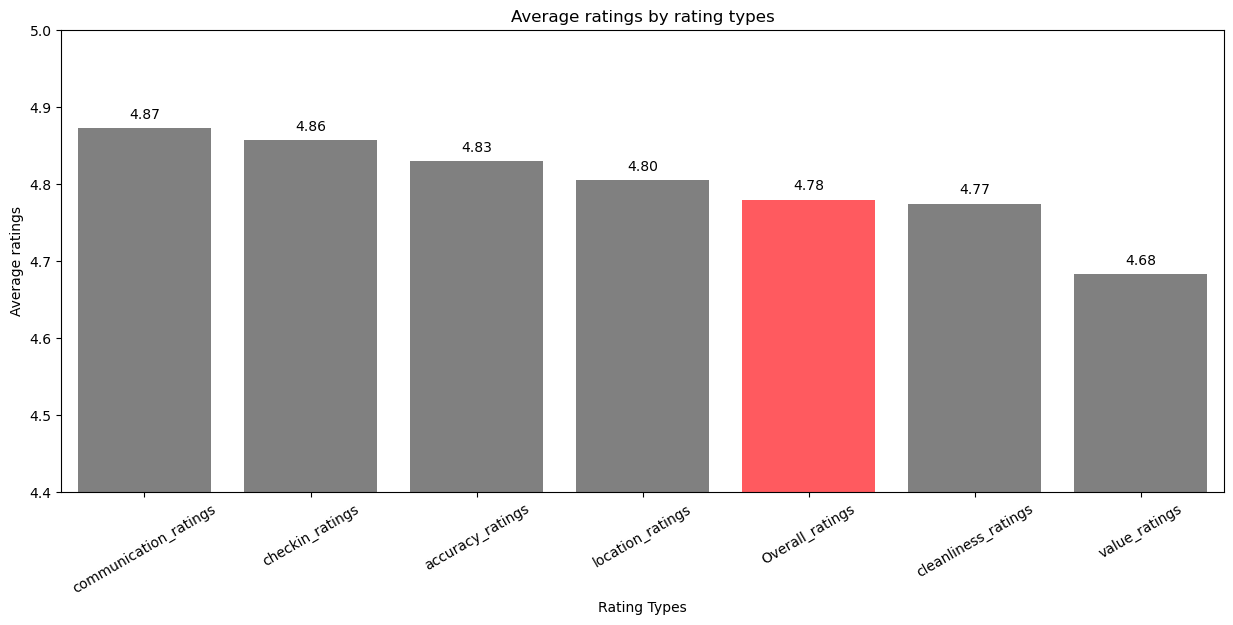

In [15]:
# Calculate the mean ratings for each review rating type including the overall rating
ratings_mean=df_ratings.mean().sort_values(ascending=False)

# Rename index values
ratings_mean=ratings_mean.rename(index={'review_scores_Overall': 'Overall_ratings', 
                                        'review_scores_accuracy': 'accuracy_ratings', 
                                        'review_scores_cleanliness':'cleanliness_ratings',
                                        'review_scores_checkin': 'checkin_ratings', 
                                        'review_scores_communication': 'communication_ratings',
                                        'review_scores_location':'location_ratings',
                                        'review_scores_value': 'value_ratings'})
# Set figure size
plt.figure(figsize=(15,6))

# Creating the barplot
ax = sns.barplot(x=ratings_mean.index, y=ratings_mean.values, errorbar=None, color='grey')


# Set different color for overall rating
ax.patches[4].set_facecolor('#FF5A5F') 

# Set labels
plt.title('Average ratings by rating types')
plt.xlabel('Rating Types')
plt.ylabel('Average ratings')

ax.set_xticklabels(ratings_mean.index, ha="right")

# Annotate the star ratings for each type of rating
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Edit x labels
plt.xticks(ha='center', rotation =30)

# Setting y-axis to start from 4.4
plt.ylim(4.4, 5)

plt.show()

The analysis reveals several key insights regarding guest ratings for listings. 

- Despite individual rating categories receiving high average scores above **4.6**, the overall average rating for listings tends to be slightly lower, indicating potential disparities in guest satisfaction across different aspects of the accommodation.

- Notably, guests appear to be particularly critical of the value aspect, with the value rating averaging **4.68**. This suggests that some guests may perceive certain listings as offering less value for the price paid, impacting their overall satisfaction.

- Therefore, we will explore whether cheaper listings tend to receive worse reviews to try to understand the relationship between pricing and guest satisfaction.

***

## Overall Ratings Distribution by Price Ranges <a id="b1.9"></a>

Because our findings on the sub-ratings distribution all indicate that guests tend to be crucial of the values of the listings, we are interested in how prices relate to the overall ratings.

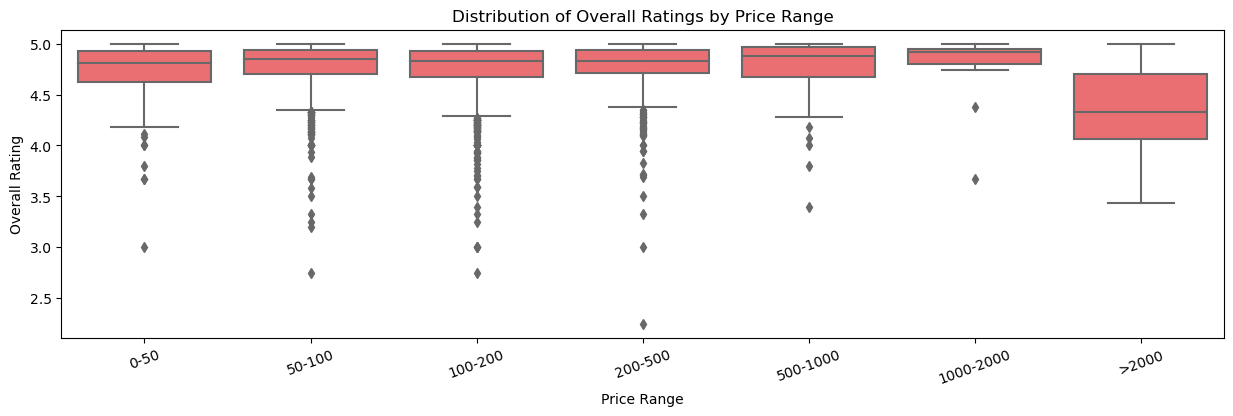

In [16]:
# Define price regions
price_ranges = [(0, 50),(50,100),(100, 200),(200, 500),(500,1000),(1000, 2000),(2000, np.inf)]

# Create dataframe contains price and overall rating information
df_ratings_by_price = df_listings_clean[['price', 'review_scores_Overall']]

# Extract series contain ranges for each row's price
price_by_range=pd.cut(df_ratings_by_price['price'], 
                      bins=[price_range[0] for price_range in price_ranges] + [np.inf], 
                      labels=[f"{price_range[0]}-{price_range[1]}" 
                              if price_range[1] != np.inf 
                              else f">{price_range[0]}" for price_range in price_ranges]
                     )

# Define figure size
plt.figure(figsize=(15, 4))

# Create boxplot
ax=sns.boxplot(x=price_by_range.values, y='review_scores_Overall', data=df_ratings_by_price, color='#FF5A5F')

# Add labels and title
ax.set_title('Distribution of Overall Ratings by Price Range')
ax.set_xlabel('Price Range')
ax.set_ylabel('Overall Rating')
plt.xticks(rotation=20)

plt.show()

- The boxplots reveal some intriguing results. We observe that listings with prices between **0-50** pounds do not exhibit low overall ratings; their distribution is similar to other price ranges. This suggests that guests may not have excessively high expectations for cheaper rentals, resulting in overall ratings that are not significantly lower. 

- Listings priced between **1000-2000** pounds tend to receive the highest ratings, indicating consistent positive feedback from guests towards listings within this price range. 

- However, listings priced at **more than 2000** pounds display a wider distribution of overall ratings, suggesting that guests have higher expectations for more expensive listings, leading to more various critical ratings. 

- The variability in the distribution of ratings for the middle price range indicates that it is unlikely to capture rating trends solely by checking the price of the listing. Therefore, it is crucial for us to use guest reviews to analyze overall ratings in more detail.

***

## Distribution of current binary columns

We would like to see the distributions of the current binary columns, so that we can decide whether these features are useful for our analysis or not by checking if they are imbalanced.

In [17]:
# Select current binary columns in the listing dataset
df_listings_binary=df_listings_clean[[i for i in df_listings_clean.columns if df_listings_clean[i].nunique()==2]]

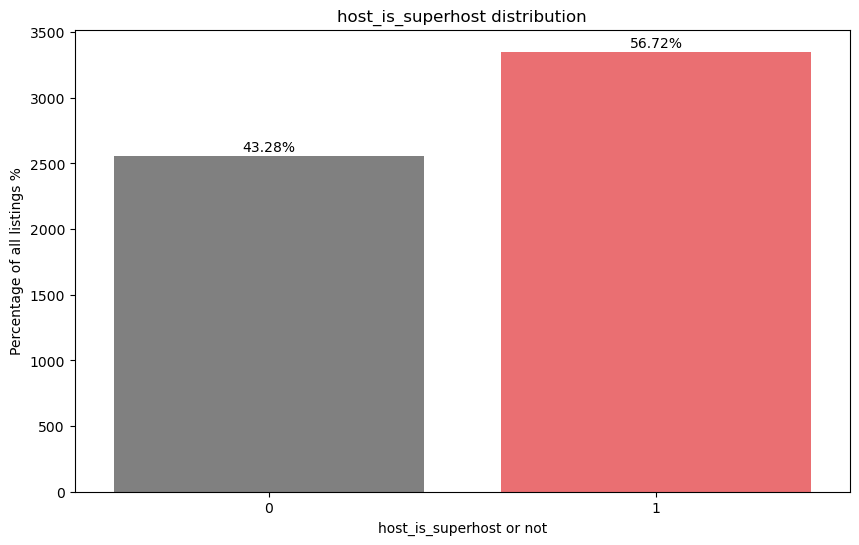

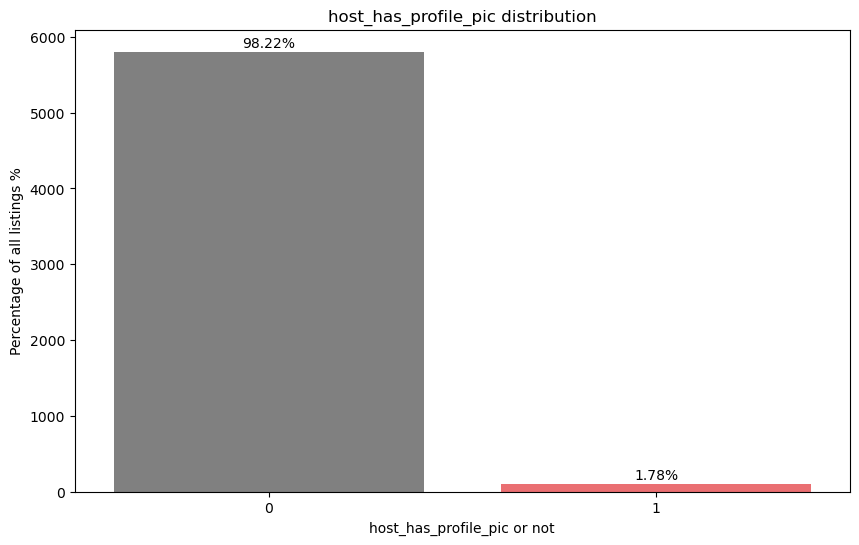

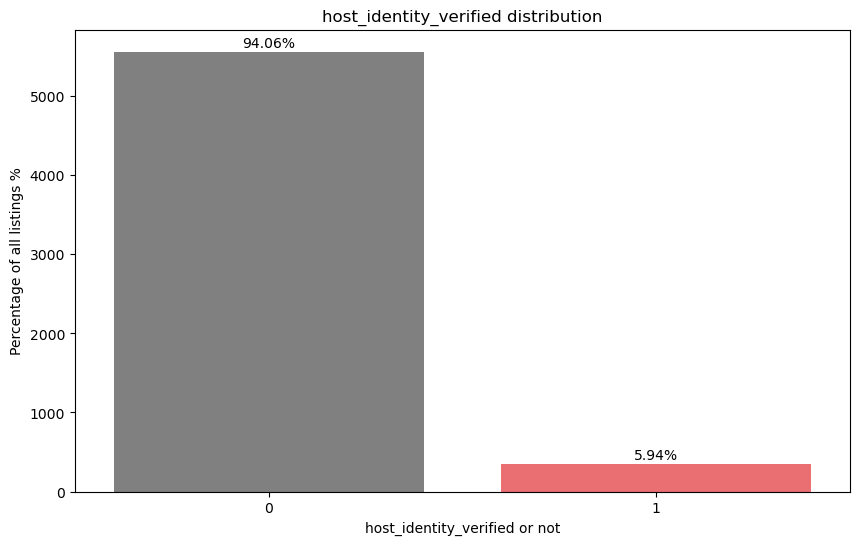

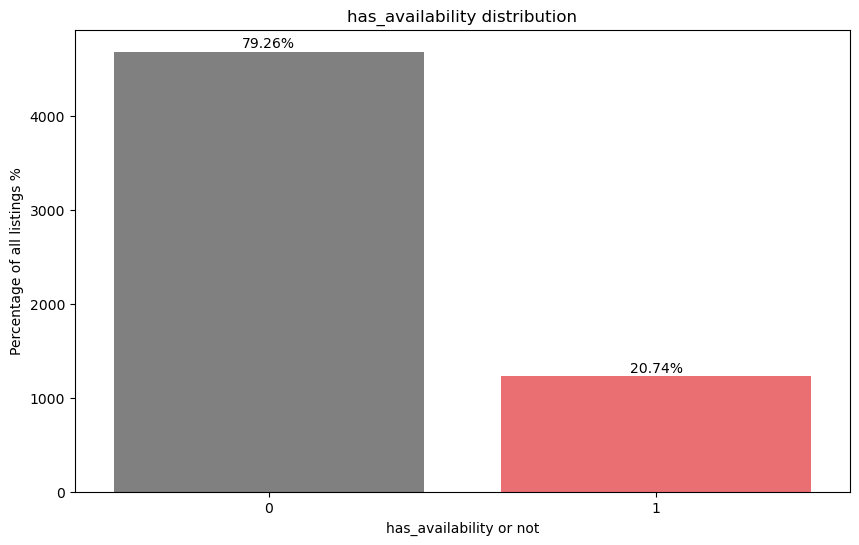

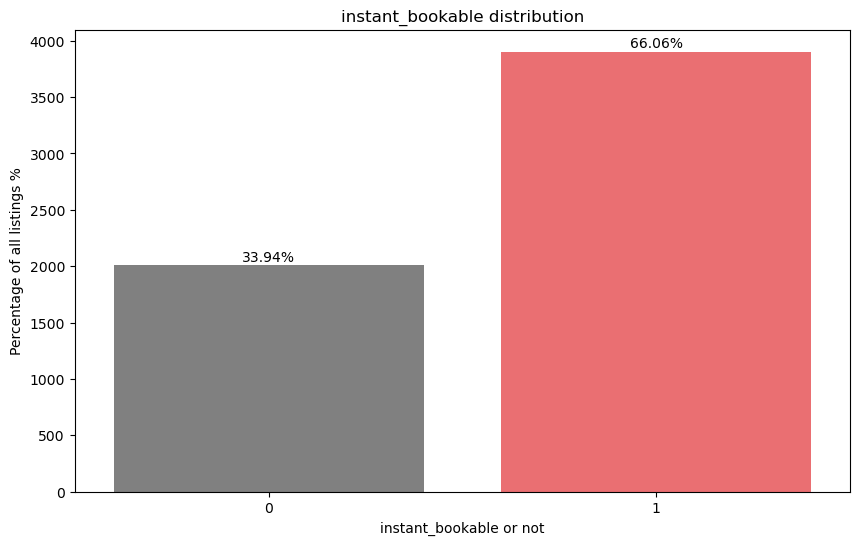

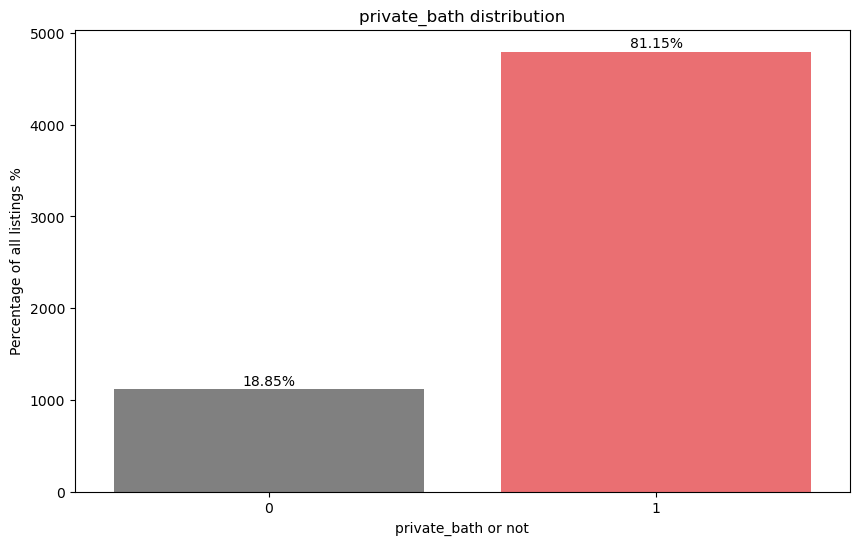

In [18]:
# Plot proportion barplot for all binary columns
for i in df_listings_binary.columns:
    # Decide each figure size
    plt.figure(figsize=(10,6))
    
    # Plot the barplot showing number of reviews with positive score and negative score respectively
    ax = sns.barplot(x=df_listings_binary[i].value_counts().index, 
                     y=df_listings_binary[i].value_counts().values,
                    palette=['grey', '#FF5A5F'])
    
    # Annotate with percentage
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/df_listings_binary.shape[0])
        height = p.get_height()
        ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points')

    # Add labels
    plt.title(f'{i} distribution')
    plt.xlabel(f'{i} or not')
    plt.ylabel('Percentage of all listings %')
    
    plt.show()        

From the above barplots, we observe that the `host_has_profile_pic` and `host_identity_verified` columns are highly imbalanced, which means they won't provide any useful information in our future analysis. Therefore, we will drop them in the later pre-processed stage.

***

## Histograms for all Numerical Features <a id="b1.10"></a>

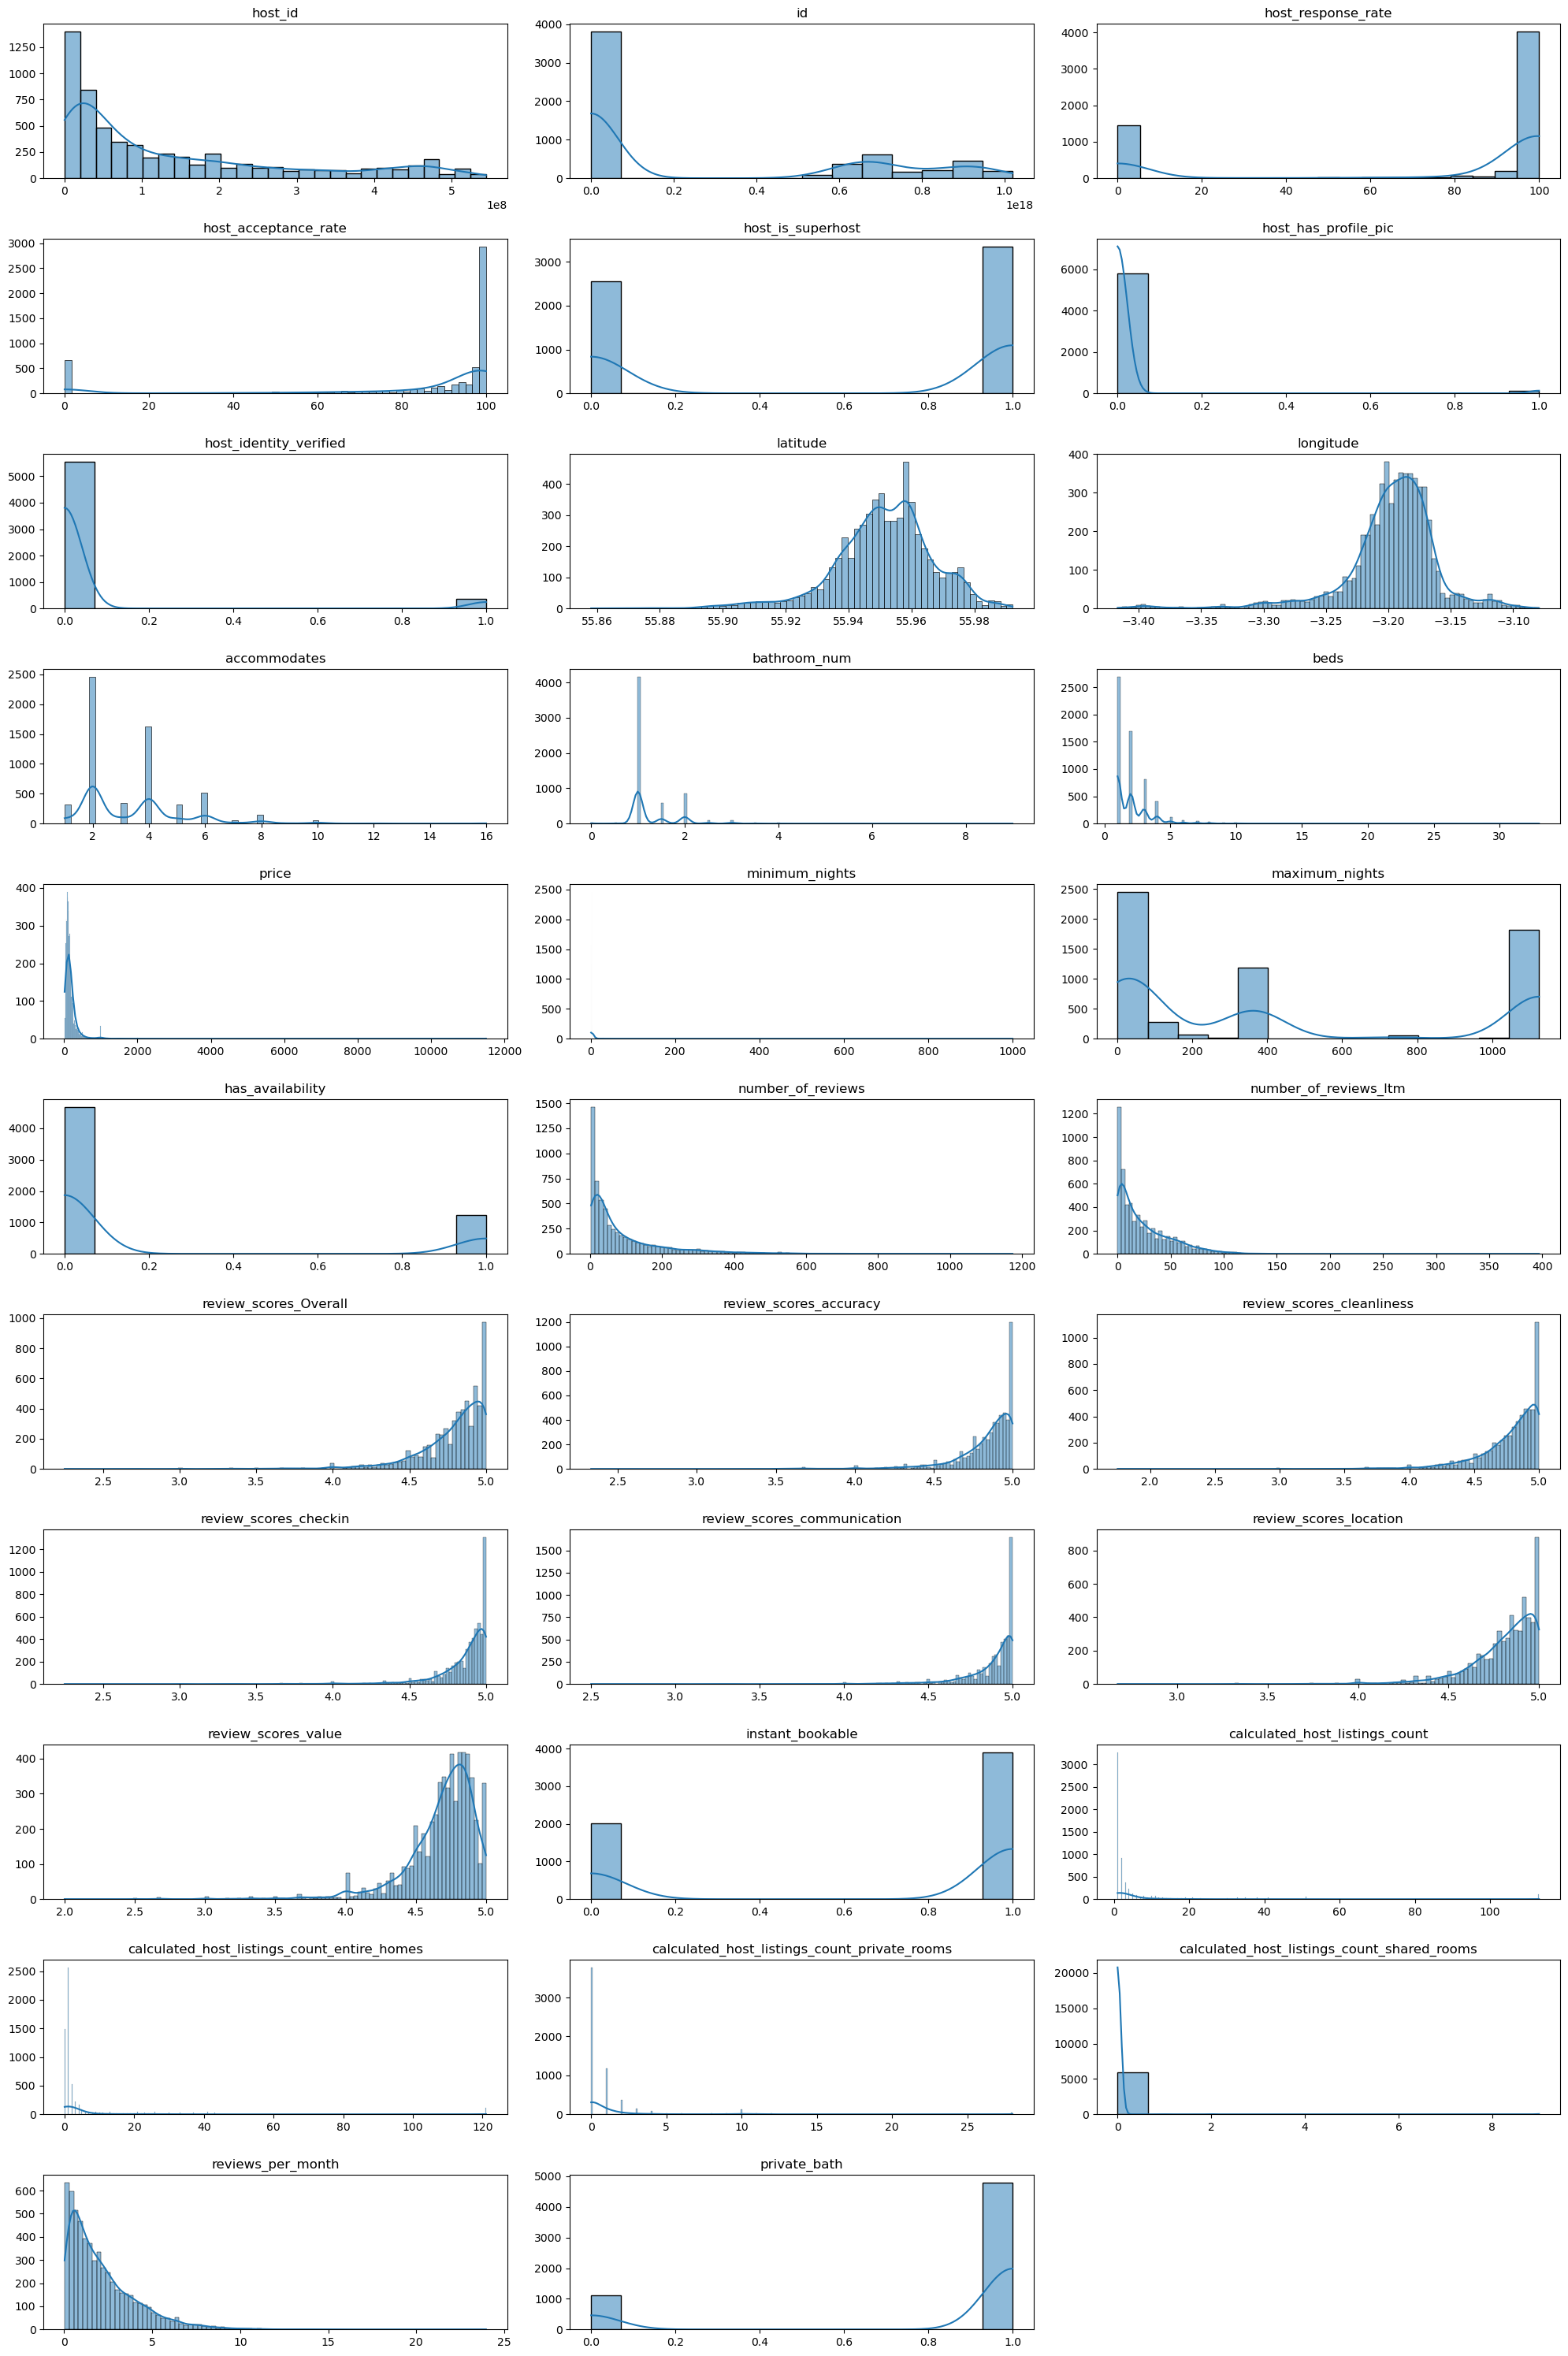

In [19]:
df_listings_num=df_listings_clean.select_dtypes(exclude='object')

plt.figure(figsize=(20, 30))
for i, column in enumerate(df_listings_num.columns):
    plt.subplot(len(df_listings_num.columns) // 3 + 1, 3, i + 1)
    sns.histplot(df_listings_num[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('') 

plt.tight_layout()
plt.show()

From the distributions of all the numerical columns, we observe that the `host_response_rate` is mostly at 100% and 0%, indicating that most hosts respond to guests' requests all the time. This can be reflected in the generally high communication rating analysed above. The `host_acceptance_rate` shows a similar distribution. 

It is worth noting that the `review_scores_value` varies the most between 4 to 5 compared to the distributions of other sub-ratings reflected in the generally harsh scores guest give to the Airbnb listings.

***

# Review Findings

In [20]:
df_reviews_by_listing = joblib.load('data/df_reviews_by_listing.pkl')

There are 117535122 words in the combination of all reviews


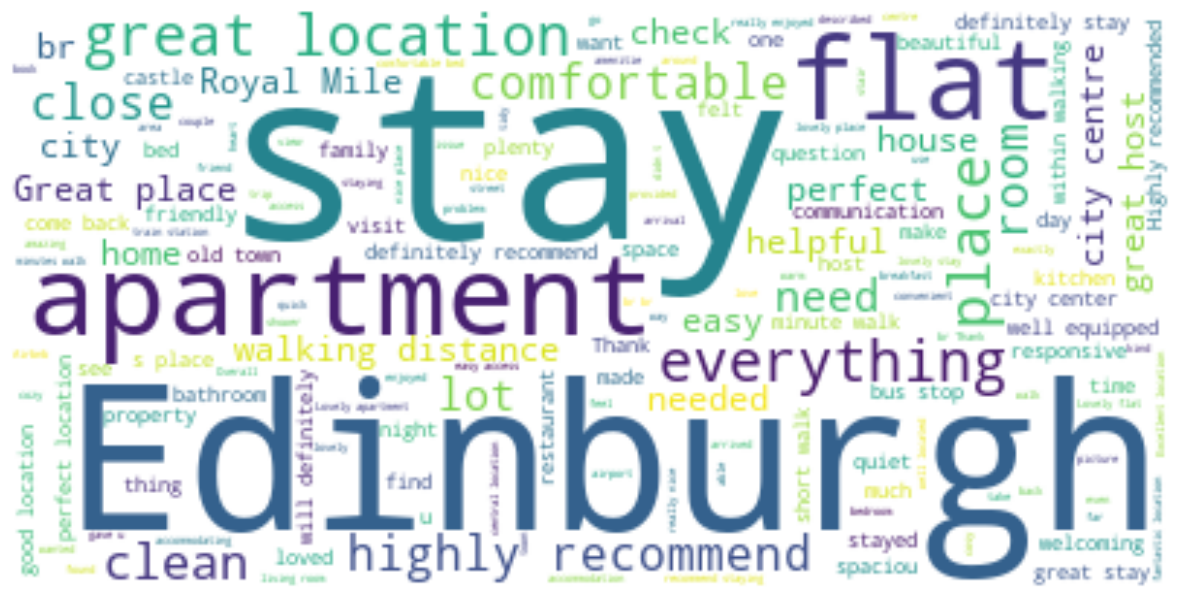

In [21]:
from wordcloud import WordCloud

# combine all reviews into a text to create wordcloud
text = " ".join(review for review in df_reviews_by_listing['comments'])
print(f'There are {len(text)} words in the combination of all reviews')

# create the wordcloud
plt.figure(figsize=(15,10))
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud displays the most frequent words in the cleaned review data. It's evident that since the data was chosen on Edinburgh Airbnbs, the word **'Edinburgh'** appears most frequently. Words like **'stay'** , **'flat'**, and **'apartment'** are also recognizable in the cloud. However, some of these words do not provide much information for our future analysis, so we will include them ('Edinburgh', 'flat', 'apartment') in our stop word list during the text vectorization stage of our modeling process.

Other recognizable words include **'comfortable'**, **'everything'**, and **'walking distance'** suggest that these might be key words that could potentially serve as indicators of guest sentiments.

***

# EDA Summary

***

### Extract datasets

In [22]:
# Save data as pickle file in my data folder
joblib.dump(df_listings_clean_senti, 'data/df_listings_clean_senti.pkl')

['data/df_listings_clean_senti.pkl']

***

In the next notebook, more cleaning and pre-processing steps will be executed. We will explore the review texts in more detail, and we will also add the EDA findings relate to the reviews in this notebook above. The preprocessing contents can be found in the next Notebook CL_Capstone_Preprocessing.